In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# In this project we will use customer_churn_dataset-training-master.csv

## Loading the both of the dataset but we will use train dataset

In [2]:
train_df = pd.read_csv("customer_churn_dataset-training-master.csv")
test_df = pd.read_csv("customer_churn_dataset-testing-master.csv")

print(f'The shape of the train_df is {train_df.shape}')
print(f'The shape of the test_df is {test_df.shape}')

The shape of the train_df is (440833, 12)
The shape of the test_df is (64374, 12)


In [4]:
train_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [6]:
train_df.isnull().sum().sort_values(ascending = True)

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [7]:
train_df.duplicated().sum()

np.int64(0)

### - 1 means a customer has churned (left or stopped using the service) 
### - 0 means the customer is active (did not churn)

In [10]:
train_df['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

In [11]:
train_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


### Checking the unique values in target 

In [15]:
train_df['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

### Checking the gender category

In [16]:
train_df['Gender'].value_counts()

Gender
Male      250252
Female    190580
Name: count, dtype: int64

### Subscription and contract

In [17]:
train_df['Subscription Type'].value_counts()

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

In [18]:
train_df['Contract Length'].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

### Checking the rangers

In [19]:
train_df[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']].describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000


### Data types correction for cols 

In [20]:
int_cols = ['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Last Interaction', 'Churn']

for col in int_cols:
    train_df[col] = train_df[col].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

### Identifying the culprit columns which are causing errors 

In [21]:
train_df[int_cols].isna().sum()

CustomerID          1
Age                 1
Tenure              1
Usage Frequency     1
Support Calls       1
Payment Delay       1
Last Interaction    1
Churn               1
dtype: int64

In [22]:
train_df[int_cols].apply(lambda x:x[x.isna()])

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
train_df[int_cols].apply(lambda x: np.isinf(x).sum())

CustomerID          0
Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Last Interaction    0
Churn               0
dtype: int64

In [25]:
train_df[train_df[int_cols].isna().any(axis= 1)] # This is the row causing the error

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
train_df[train_df.isna().all(axis= 1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
train_df = train_df.dropna(how= 'all')

In [28]:
train_df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [29]:
train_df.shape

(440832, 12)

### Now again let's convert this shit to int 

In [31]:
int_cols = ['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Last Interaction', 'Churn']

for col in int_cols:
    train_df[col] = train_df[col].astype(int)

C:\Users\Suraj Singh\AppData\Local\Temp\ipykernel_11076\1185203314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = train_df[col].astype(int)
C:\Users\Suraj Singh\AppData\Local\Temp\ipykernel_11076\1185203314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = train_df[col].astype(int)
C:\Users\Suraj Singh\AppData\Local\Temp\ipykernel_11076\1185203314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [36]:
train_df.dtypes

CustomerID             int64
Age                    int64
Gender                object
Tenure                 int64
Usage Frequency        int64
Support Calls          int64
Payment Delay          int64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction       int64
Churn                  int64
dtype: object

### Now renaming the columns 

In [37]:
train_df.columns = train_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [38]:
train_df.head()

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1


### Churn Distribution

In [39]:
train_df['churn'].value_counts(normalize= True) * 100

churn
1    56.71072
0    43.28928
Name: proportion, dtype: float64

Text(0, 0.5, 'Count')

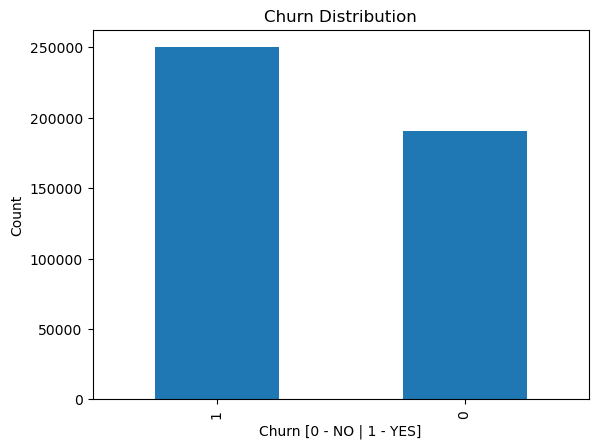

In [40]:
train_df['churn'].value_counts().plot(kind = 'bar')
plt.title("Churn Distribution")
plt.xlabel("Churn [0 - NO | 1 - YES]")
plt.ylabel("Count")

### Gender vs Churn

Text(0.5, 1.0, 'Churn By Gender')

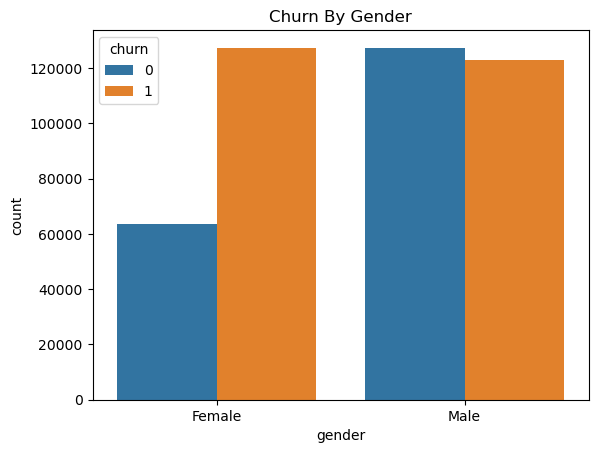

In [42]:
sns.countplot(x = 'gender', hue='churn', data= train_df)
plt.title("Churn By Gender")

### Subscription Type vs Churn

Text(0.5, 1.0, 'Churn By Subscription Type')

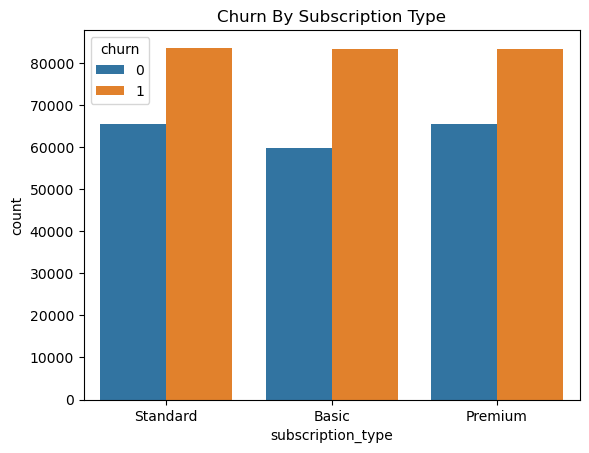

In [43]:
sns.countplot(x = 'subscription_type', hue='churn', data=train_df)
plt.title("Churn By Subscription Type")

### Contract Length vs Churn

Text(0.5, 1.0, 'Churn By Contract Length')

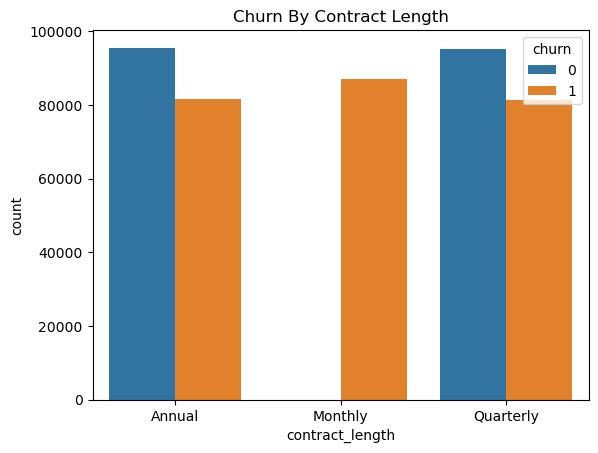

In [44]:
sns.countplot(x = 'contract_length', hue='churn', data=train_df)
plt.title('Churn By Contract Length')

### Tenure vs Churn

Text(0.5, 1.0, 'Tenure vs Churn')

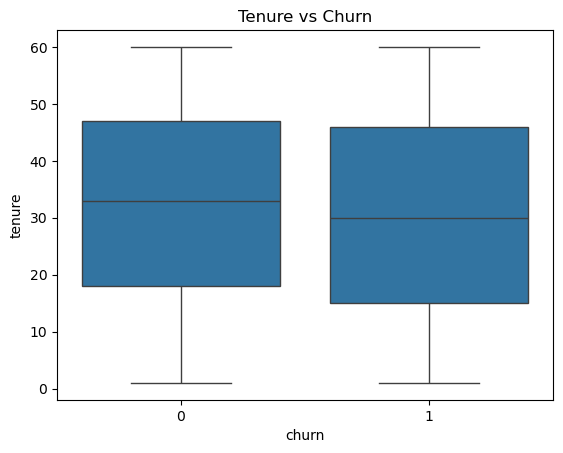

In [46]:
sns.boxplot(x='churn', y='tenure', data=train_df)
plt.title("Tenure vs Churn")

### Usage Frequency vs Churn

Text(0.5, 1.0, 'Usage Frequency vs Churn')

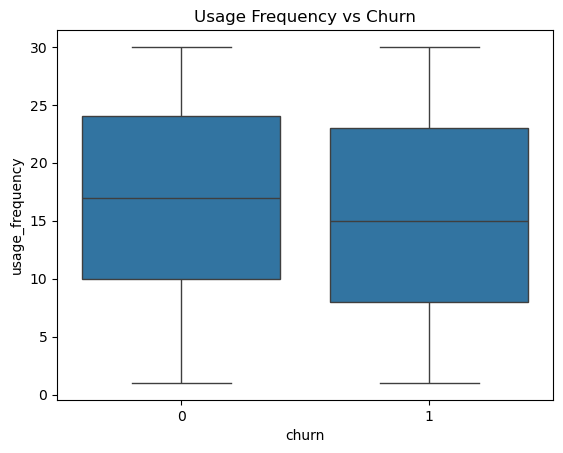

In [48]:
sns.boxplot(x='churn', y='usage_frequency', data=train_df)
plt.title("Usage Frequency vs Churn")

### Support Calls vs Churn

Text(0.5, 1.0, 'Support Calls vs Churn')

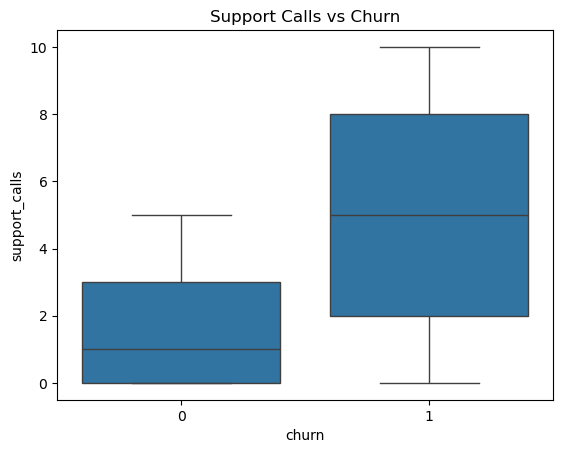

In [50]:
sns.boxplot(x='churn', y='support_calls', data=train_df)
plt.title("Support Calls vs Churn")

### Payment Delay vs Churn

Text(0.5, 1.0, 'Payment Delay vs Churn')

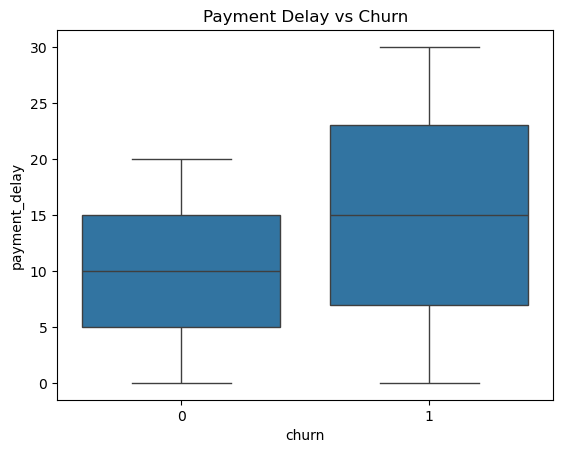

In [51]:
sns.boxplot(x='churn', y='payment_delay', data=train_df)
plt.title("Payment Delay vs Churn")

### Total Spend vs Churn

Text(0.5, 1.0, 'Total Spend vs Churn')

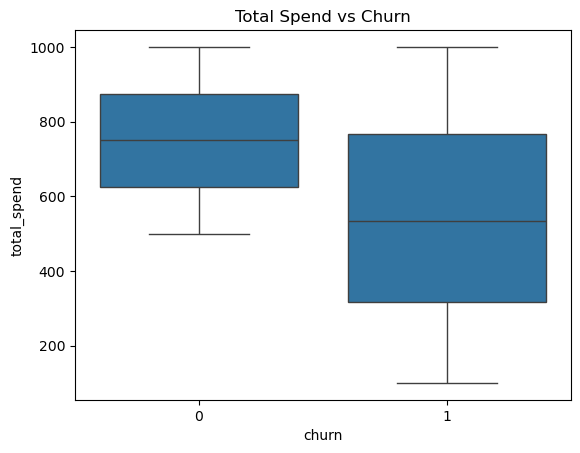

In [54]:
sns.boxplot(x='churn', y='total_spend', data=train_df)
plt.title("Total Spend vs Churn")

### Last Interaction

Text(0.5, 1.0, 'Last Interaction vs Churn')

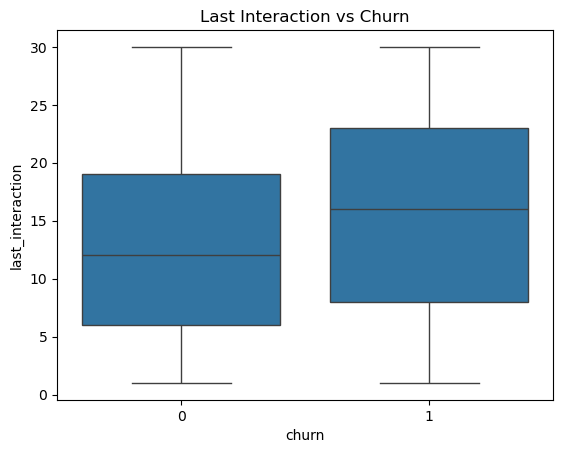

In [55]:
sns.boxplot(x='churn', y='last_interaction', data=train_df)
plt.title("Last Interaction vs Churn")

### Correlation & Patterns

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Female'

<Figure size 1000x600 with 0 Axes>

### Corr() needs only numeric columns for making a heatmap. so i will select only int and float cols 

In [58]:
numeric_train_df = train_df.select_dtypes(include=['int64', 'float64'])

Text(0.5, 1.0, 'Correlation Heatmap')

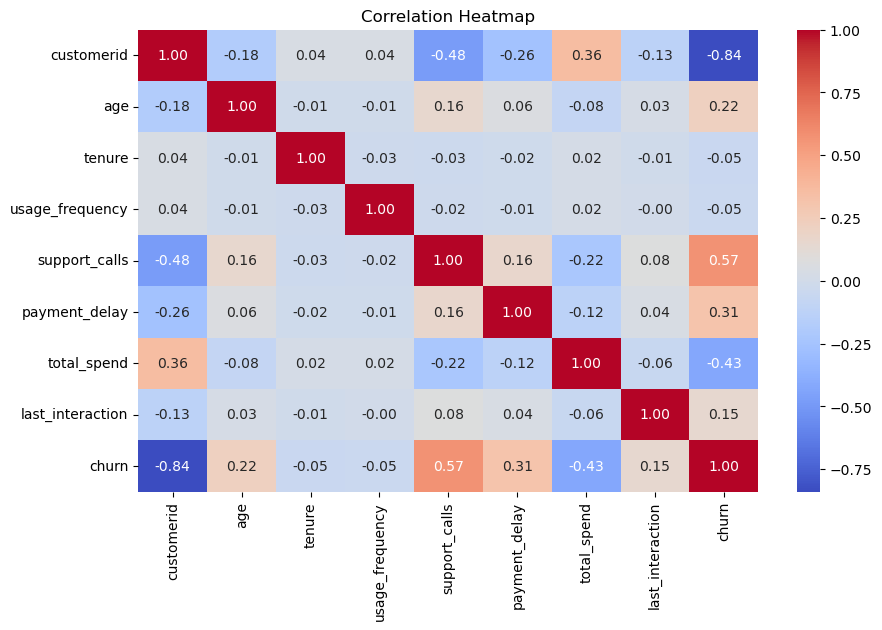

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_train_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")